In [138]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib import pyplot
%matplotlib inline
import missingno as msno

In [3]:
pd.set_option('display.max_rows', 350)
pd.set_option('display.max_columns', 30)

## Loading and Analyzing Data

In [4]:
df1=pd.read_excel("D://DataScience/Projects/P1/sample_service.xlsx")
df1.head()

,ID,ID_status,active,count_reassign,count_opening,count_updated,ID_caller,opened_by,opened_time,Created_by,created_at,updated_by,updated_at,type_contact,location,Category Id,user_symptom,Support_group,support_incharge,Doc_knowledge,confirmation_check,impact,notify,problem_ID,change_request
0,INC0000045,New,True,0,0,0,Caller 2403,Opened by 8,2016-02-29 01:16:00,Created by 6,2016-02-29 01:23:00,Updated by 21,2016-02-29 01:23:00,Phone,Location 143,Subcategory 170,Symptom 72,Group 56,?,True,False,2 - Medium,Do Not Notify,?,?
1,INC0000045,Resolved,True,0,0,2,Caller 2403,Opened by 8,2016-02-29 01:16:00,Created by 6,2016-02-29 01:23:00,Updated by 642,2016-02-29 08:53:00,Phone,Location 143,Subcategory 170,Symptom 72,Group 56,?,True,False,2 - Medium,Do Not Notify,?,?
2,INC0000045,Resolved,True,0,0,3,Caller 2403,Opened by 8,2016-02-29 01:16:00,Created by 6,2016-02-29 01:23:00,Updated by 804,2016-02-29 11:29:00,Phone,Location 143,Subcategory 170,Symptom 72,Group 56,?,True,False,2 - Medium,Do Not Notify,?,?
3,INC0000045,Closed,False,0,0,4,Caller 2403,Opened by 8,2016-02-29 01:16:00,Created by 6,2016-02-29 01:23:00,Updated by 908,2016-03-05 12:00:00,Phone,Location 143,Subcategory 170,Symptom 72,Group 56,?,True,False,2 - Medium,Do Not Notify,?,?
4,INC0000047,New,True,0,0,0,Caller 2403,Opened by 397,2016-02-29 04:40:00,Created by 171,2016-02-29 04:57:00,Updated by 746,2016-02-29 04:57:00,Phone,Location 165,Subcategory 215,Symptom 471,Group 70,Resolver 89,True,False,2 - Medium,Do Not Notify,?,?


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   ID                  349 non-null    object        
 1   ID_status           349 non-null    object        
 2   active              349 non-null    bool          
 3   count_reassign      349 non-null    int64         
 4   count_opening       349 non-null    int64         
 5   count_updated       349 non-null    int64         
 6   ID_caller           349 non-null    object        
 7   opened_by           349 non-null    object        
 8   opened_time         349 non-null    datetime64[ns]
 9   Created_by          349 non-null    object        
 10  created_at          349 non-null    object        
 11  updated_by          349 non-null    object        
 12  updated_at          349 non-null    datetime64[ns]
 13  type_contact        349 non-null    object        

### Data types are object, int64, bool and datetime 64

In [6]:
df1.isna().sum()

ID                    0
ID_status             0
active                0
count_reassign        0
count_opening         0
count_updated         0
ID_caller             0
opened_by             0
opened_time           0
Created_by            0
created_at            0
updated_by            0
updated_at            0
type_contact          0
location              0
Category Id           0
user_symptom          0
Support_group         0
support_incharge      0
Doc_knowledge         0
confirmation_check    0
impact                0
notify                0
problem_ID            0
change_request        0
dtype: int64

No null values but some columns filled with "?" symbols

### No Null Values

<AxesSubplot:>

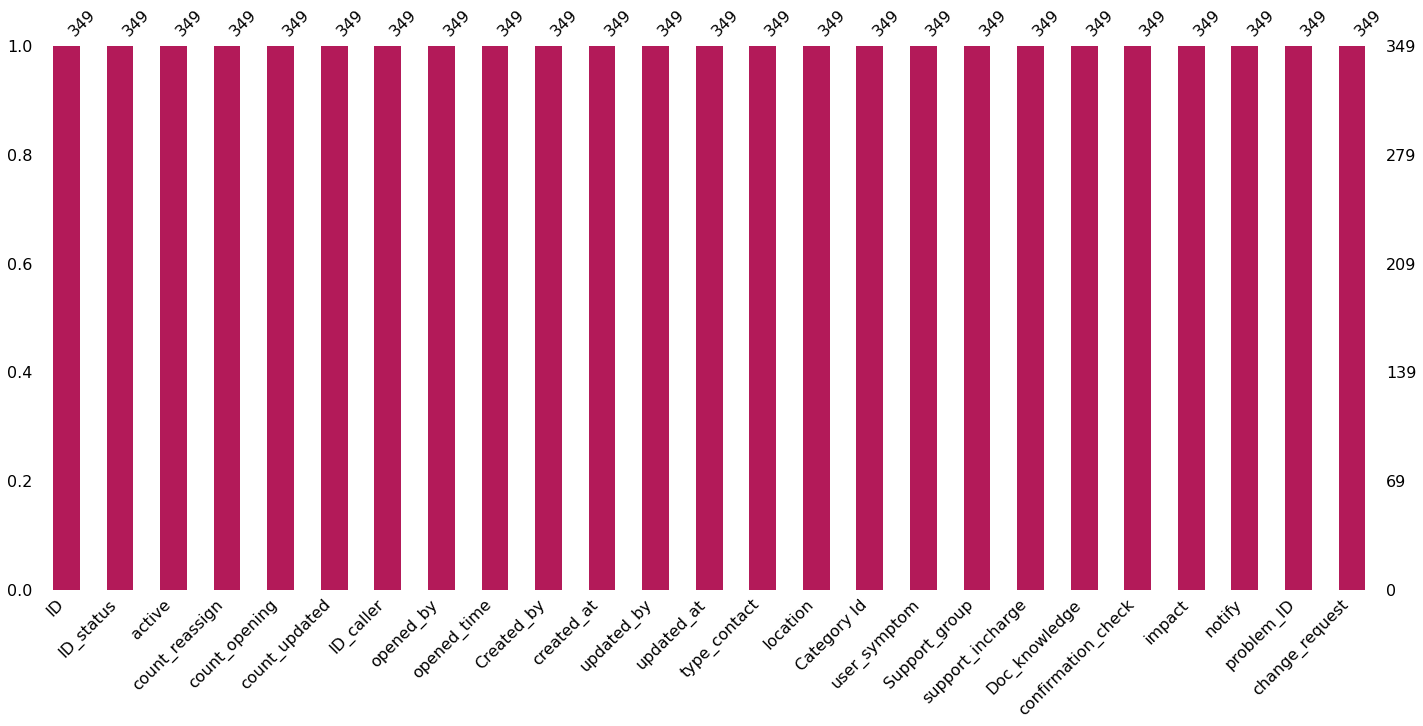

In [7]:
# Detecting missing data visually
msno.bar(df1,color=(0.70, 0.10, 0.35))

<AxesSubplot:xlabel='confirmation_check'>

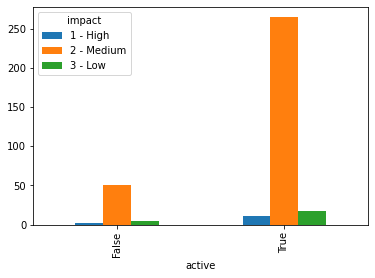

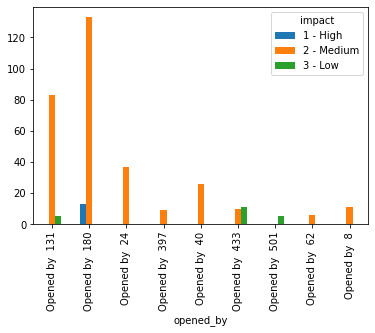

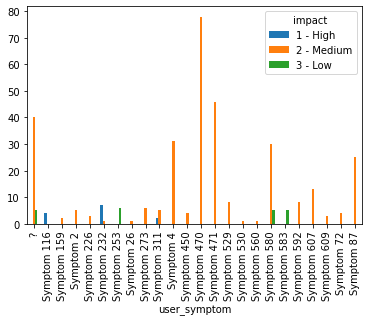

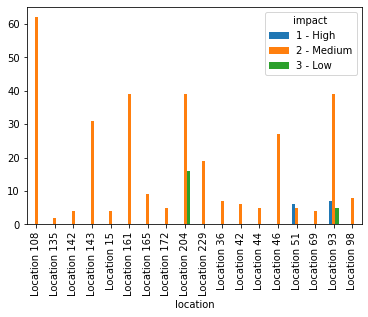

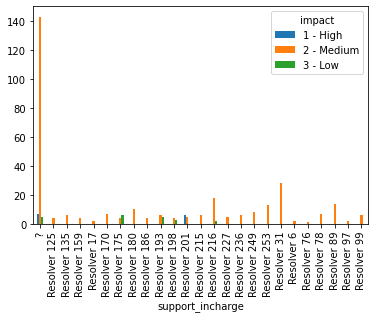

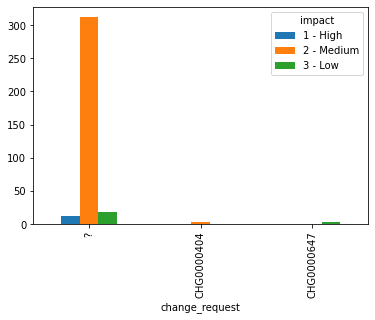

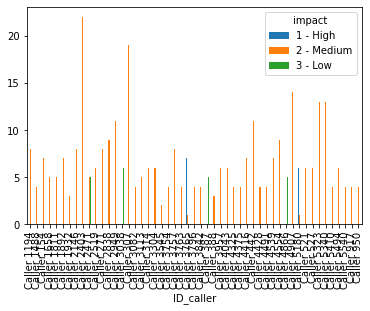

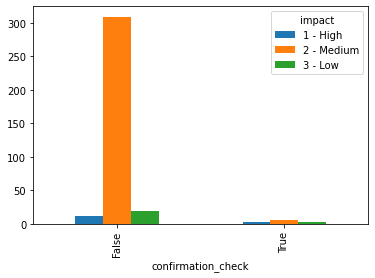

In [8]:
pd.crosstab(df1.active,df1.impact).plot(kind="bar")
pd.crosstab(df1.opened_by,df1.impact).plot(kind="bar")
pd.crosstab(df1.user_symptom,df1.impact).plot(kind="bar")
pd.crosstab(df1.location,df1.impact).plot(kind="bar")
pd.crosstab(df1.support_incharge,df1.impact).plot(kind="bar")
pd.crosstab(df1.change_request,df1.impact).plot(kind="bar")
pd.crosstab(df1.ID_caller,df1.impact).plot(kind="bar")
pd.crosstab(df1.confirmation_check,df1.impact).plot(kind="bar")

<AxesSubplot:xlabel='impact', ylabel='count'>

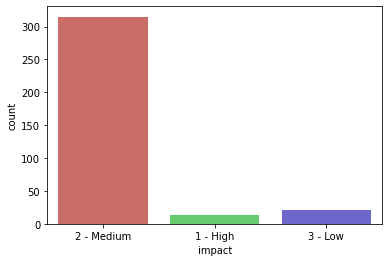

In [9]:
sns.countplot(x="impact",data=df1,palette="hls")

## Identify Unique Values for Categorical columns and imputing

In [10]:
df1.impact.unique()
#len(movies_df.userId.unique())

array(['2 - Medium', '1 - High', '3 - Low'], dtype=object)

In [11]:
df1.Doc_knowledge.unique()

array([ True])

In [12]:
# Imputing Created by and updated by with default value
df1['Created_by'] = df1['Created_by'].replace(['?'],'Created by X')
df1['updated_by'] = df1['updated_by'].replace(['?'],'Created by X')
print (df1.Created_by.unique(),'\n',df1.updated_by.unique())

['Created by 6' 'Created by 171' 'Created by X' 'Created by 81'
 'Created by 62' 'Created by 13' 'Created by 20'] 
 ['Updated by 21' 'Updated by 642' 'Updated by 804' 'Updated by 908'
 'Updated by 746' 'Updated by 703' 'Updated by 332' 'Updated by 451'
 'Updated by 340' 'Updated by 465' 'Updated by 241' 'Updated by 60'
 'Updated by 265' 'Updated by 723' 'Updated by 307' 'Updated by 967'
 'Updated by 798' 'Updated by 653' 'Updated by 750' 'Updated by 164'
 'Updated by 862' 'Updated by 874' 'Updated by 88' 'Updated by 928'
 'Updated by 336' 'Updated by 135' 'Updated by 974' 'Updated by 713'
 'Updated by 199' 'Updated by 664' 'Updated by 578' 'Updated by 111'
 'Updated by 310' 'Updated by 402' 'Updated by 789' 'Updated by 15'
 'Updated by 429' 'Updated by 727' 'Updated by 259' 'Updated by 507'
 'Updated by 277' 'Updated by 213' 'Updated by 833' 'Updated by 868'
 'Updated by 681' 'Updated by 419' 'Updated by 608' 'Updated by 614'
 'Updated by 881' 'Updated by 344' 'Updated by 994' 'Updated

In [13]:
df1['support_incharge'] = df1['support_incharge'].replace(['?'],'Resolver X')
print (df1.support_incharge.unique())

['Resolver X' 'Resolver 89' 'Resolver 31' 'Resolver 6' 'Resolver 125'
 'Resolver 78' 'Resolver 186' 'Resolver 216' 'Resolver 236' 'Resolver 17'
 'Resolver 249' 'Resolver 193' 'Resolver 180' 'Resolver 175' 'Resolver 97'
 'Resolver 76' 'Resolver 201' 'Resolver 215' 'Resolver 227' 'Resolver 159'
 'Resolver 170' 'Resolver 99' 'Resolver 253' 'Resolver 198' 'Resolver 135']


In [14]:
df1['problem_ID'] = df1['problem_ID'].replace(['?'],'Problem ID  X')
print (df1.problem_ID.unique())

['Problem ID  X' 'Problem ID  2']


In [15]:
df1['change_request'] = df1['change_request'].replace(['?'],'CHG0000000')
print (df1.change_request.unique())

['CHG0000000' 'CHG0000404' 'CHG0000647']


In [16]:
df1['type_contact'] = df1['type_contact'].replace(['Phone'],'1')
df1['Doc_knowledge'] = df1['Doc_knowledge'].replace([ True],'1')
df1['notify'] = df1['notify'].replace(['Do Not Notify'],'1')

In [17]:
df1.head()

,ID,ID_status,active,count_reassign,count_opening,count_updated,ID_caller,opened_by,opened_time,Created_by,created_at,updated_by,updated_at,type_contact,location,Category Id,user_symptom,Support_group,support_incharge,Doc_knowledge,confirmation_check,impact,notify,problem_ID,change_request
0,INC0000045,New,True,0,0,0,Caller 2403,Opened by 8,2016-02-29 01:16:00,Created by 6,2016-02-29 01:23:00,Updated by 21,2016-02-29 01:23:00,1,Location 143,Subcategory 170,Symptom 72,Group 56,Resolver X,1,False,2 - Medium,1,Problem ID X,CHG0000000
1,INC0000045,Resolved,True,0,0,2,Caller 2403,Opened by 8,2016-02-29 01:16:00,Created by 6,2016-02-29 01:23:00,Updated by 642,2016-02-29 08:53:00,1,Location 143,Subcategory 170,Symptom 72,Group 56,Resolver X,1,False,2 - Medium,1,Problem ID X,CHG0000000
2,INC0000045,Resolved,True,0,0,3,Caller 2403,Opened by 8,2016-02-29 01:16:00,Created by 6,2016-02-29 01:23:00,Updated by 804,2016-02-29 11:29:00,1,Location 143,Subcategory 170,Symptom 72,Group 56,Resolver X,1,False,2 - Medium,1,Problem ID X,CHG0000000
3,INC0000045,Closed,False,0,0,4,Caller 2403,Opened by 8,2016-02-29 01:16:00,Created by 6,2016-02-29 01:23:00,Updated by 908,2016-03-05 12:00:00,1,Location 143,Subcategory 170,Symptom 72,Group 56,Resolver X,1,False,2 - Medium,1,Problem ID X,CHG0000000
4,INC0000047,New,True,0,0,0,Caller 2403,Opened by 397,2016-02-29 04:40:00,Created by 171,2016-02-29 04:57:00,Updated by 746,2016-02-29 04:57:00,1,Location 165,Subcategory 215,Symptom 471,Group 70,Resolver 89,1,False,2 - Medium,1,Problem ID X,CHG0000000


## Checking the Time series data

In [18]:
print(
type(df1.updated_at), '\n',
type(df1.opened_time),'\n',
type(df1.created_at)
)

<class 'pandas.core.series.Series'> 
 <class 'pandas.core.series.Series'> 
 <class 'pandas.core.series.Series'>


## Impute Created_at with open_time where "?"

In [39]:
#Impute Created_at with open_time where ?
df1['created_at'] = df1.apply(lambda x: x['opened_time'] if x['created_at']=='?' else x['created_at'], axis=1)

## Split time series columns in to time, day and month to check the impact

In [40]:
df1["opened_month"]=df1['opened_time'].dt.strftime('%m')
df1["opened_day"]=df1['opened_time'].dt.strftime('%d')
df1["opened_hr"]=df1['opened_time'].dt.strftime('%H')
df1["created_month"]=df1['created_at'].dt.strftime('%m')
df1["created_day"]=df1['created_at'].dt.strftime('%d')
df1["created_hr"]=df1['created_at'].dt.strftime('%H')
df1["updated_month"]=df1['updated_at'].dt.strftime('%m')
df1["updated_day"]=df1['updated_at'].dt.strftime('%d')
df1["updated_hr"]=df1['updated_at'].dt.strftime('%H')
df1.head(10)

,ID,ID_status,active,count_reassign,count_opening,count_updated,ID_caller,opened_by,opened_time,Created_by,created_at,updated_by,updated_at,type_contact,location,...,Doc_knowledge,confirmation_check,impact,notify,problem_ID,change_request,opened_month,opened_day,opened_hr,created_month,created_day,created_hr,updated_month,updated_day,updated_hr
0,INC0000045,New,True,0,0,0,Caller 2403,Opened by 8,2016-02-29 01:16:00,Created by 6,2016-02-29 01:23:00,Updated by 21,2016-02-29 01:23:00,1,Location 143,...,1,False,2 - Medium,1,Problem ID X,CHG0000000,02,29,01,02,29,01,02,29,01
1,INC0000045,Resolved,True,0,0,2,Caller 2403,Opened by 8,2016-02-29 01:16:00,Created by 6,2016-02-29 01:23:00,Updated by 642,2016-02-29 08:53:00,1,Location 143,...,1,False,2 - Medium,1,Problem ID X,CHG0000000,02,29,01,02,29,01,02,29,08
2,INC0000045,Resolved,True,0,0,3,Caller 2403,Opened by 8,2016-02-29 01:16:00,Created by 6,2016-02-29 01:23:00,Updated by 804,2016-02-29 11:29:00,1,Location 143,...,1,False,2 - Medium,1,Problem ID X,CHG0000000,02,29,01,02,29,01,02,29,11
3,INC0000045,Closed,False,0,0,4,Caller 2403,Opened by 8,2016-02-29 01:16:00,Created by 6,2016-02-29 01:23:00,Updated by 908,2016-03-05 12:00:00,1,Location 143,...,1,False,2 - Medium,1,Problem ID X,CHG0000000,02,29,01,02,29,01,03,05,12
4,INC0000047,New,True,0,0,0,Caller 2403,Opened by 397,2016-02-29 04:40:00,Created by 171,2016-02-29 04:57:00,Updated by 746,2016-02-29 04:57:00,1,Location 165,...,1,False,2 - Medium,1,Problem ID X,CHG0000000,02,29,04,02,29,04,02,29,04
5,INC0000047,Active,True,1,0,1,Caller 2403,Opened by 397,2016-02-29 04:40:00,Created by 171,2016-02-29 04:57:00,Updated by 21,2016-02-29 05:30:00,1,Location 165,...,1,False,2 - Medium,1,Problem ID X,CHG0000000,02,29,04,02,29,04,02,29,05
6,INC0000047,Active,True,1,0,2,Caller 2403,Opened by 397,2016-02-29 04:40:00,Created by 171,2016-02-29 04:57:00,Updated by 21,2016-02-29 05:33:00,1,Location 165,...,1,False,2 - Medium,1,Problem ID X,CHG0000000,02,29,04,02,29,04,02,29,05
7,INC0000047,Active,True,1,0,3,Caller 2403,Opened by 397,2016-02-29 04:40:00,Created by 171,2016-02-29 04:57:00,Updated by 804,2016-02-29 11:31:00,1,Location 165,...,1,False,2 - Medium,1,Problem ID X,CHG0000000,02,29,04,02,29,04,02,29,11
8,INC0000047,Active,True,1,0,4,Caller 2403,Opened by 397,2016-02-29 04:40:00,Created by 171,2016-02-29 04:57:00,Updated by 703,2016-02-29 11:32:00,1,Location 165,...,1,False,2 - Medium,1,Problem ID X,CHG0000000,02,29,04,02,29,04,02,29,11
9,INC0000047,Active,True,1,0,5,Caller 2403,Opened by 397,2016-02-29 04:40:00,Created by 171,2016-02-29 04:57:00,Updated by 332,2016-03-01 09:14:00,1,Location 165,...,1,False,2 - Medium,1,Problem ID X,CHG0000000,02,29,04,02,29,04,03,01,09


### Drop created_at, opened_time and updated_at as we have split month, day and hr

In [41]:
df2=df1
df2 = df2.drop(['created_at'], axis=1)
df2 = df2.drop(['opened_time'], axis=1)
df2 = df2.drop(['updated_at'], axis=1)

## Label encode the categorical values

In [42]:
from sklearn.preprocessing import LabelEncoder
string=['ID_status','active','ID_caller','opened_by','Created_by','updated_by','location','Category Id','user_symptom',
       'Support_group','support_incharge','confirmation_check','impact','problem_ID','change_request']
for i in string:
    df2[i]=LabelEncoder().fit_transform(df2[i])

In [43]:
df2.head()

,ID,ID_status,active,count_reassign,count_opening,count_updated,ID_caller,opened_by,Created_by,updated_by,type_contact,location,Category Id,user_symptom,Support_group,...,Doc_knowledge,confirmation_check,impact,notify,problem_ID,change_request,opened_month,opened_day,opened_hr,created_month,created_day,created_hr,updated_month,updated_day,updated_hr
0,INC0000045,4,1,0,0,0,8,8,3,6,1,3,9,22,17,...,1,0,1,1,1,0,02,29,01,02,29,01,02,29,01
1,INC0000045,5,1,0,0,2,8,8,3,29,1,3,9,22,17,...,1,0,1,1,1,0,02,29,01,02,29,01,02,29,08
2,INC0000045,5,1,0,0,3,8,8,3,42,1,3,9,22,17,...,1,0,1,1,1,0,02,29,01,02,29,01,02,29,11
3,INC0000045,3,0,0,0,4,8,8,3,49,1,3,9,22,17,...,1,0,1,1,1,0,02,29,01,02,29,01,03,05,12
4,INC0000047,4,1,0,0,0,8,3,1,37,1,6,15,13,23,...,1,0,1,1,1,0,02,29,04,02,29,04,02,29,04


## Heat map to check any corr

<AxesSubplot:>

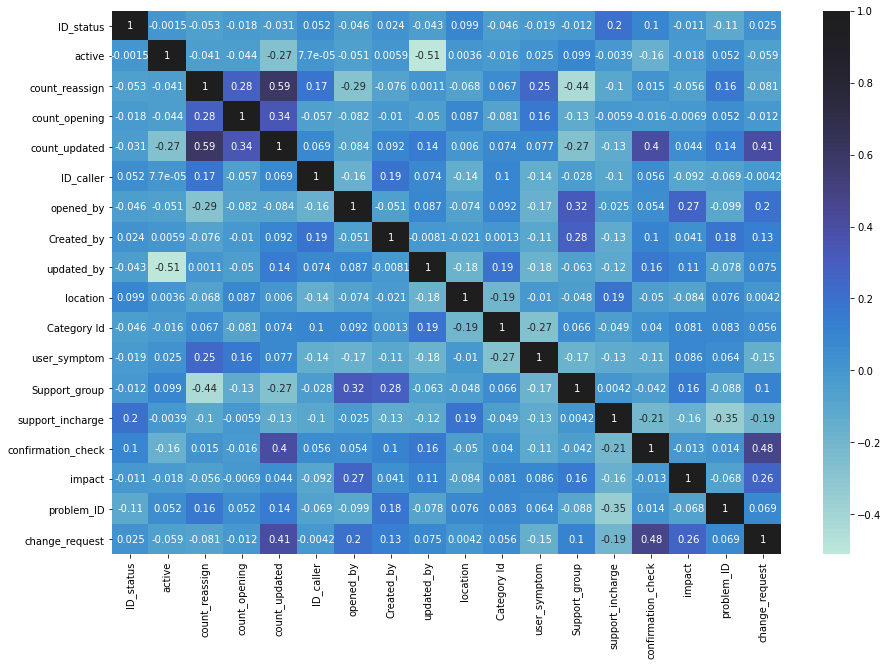

In [44]:
#Heatmap
corr=df2.corr()
top_features=corr.index
top_features
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
sns.heatmap(df2[top_features].corr(),annot=True,center=True)

[Text(0, 0, 'ID_status'),
 Text(1, 0, 'active'),
 Text(2, 0, 'count_reassign'),
 Text(3, 0, 'count_opening'),
 Text(4, 0, 'count_updated'),
 Text(5, 0, 'ID_caller'),
 Text(6, 0, 'opened_by'),
 Text(7, 0, 'Created_by'),
 Text(8, 0, 'updated_by'),
 Text(9, 0, 'location'),
 Text(10, 0, 'Category Id'),
 Text(11, 0, 'user_symptom'),
 Text(12, 0, 'Support_group'),
 Text(13, 0, 'support_incharge'),
 Text(14, 0, 'confirmation_check'),
 Text(15, 0, 'impact'),
 Text(16, 0, 'problem_ID'),
 Text(17, 0, 'change_request')]

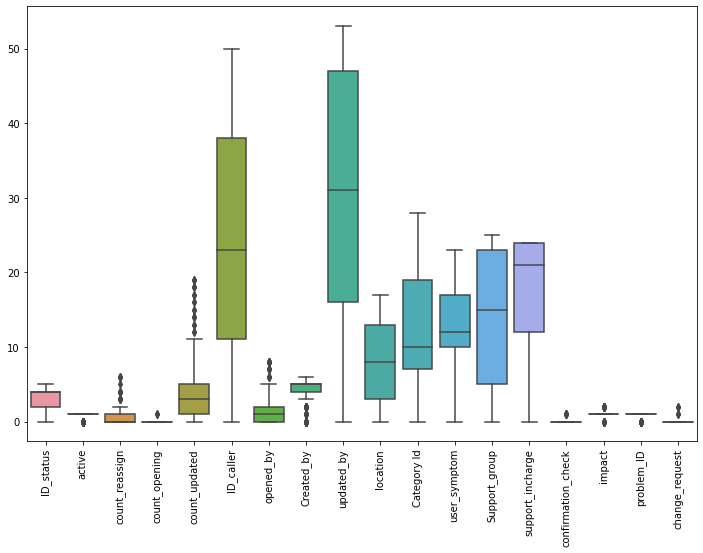

In [45]:
plt.figure(figsize=(12,8))
g=sns.boxplot(data=df2)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

There are some outliers in count assign, count updated, opened by, created by

## Drop ID column as it is not going to contribute and prepare x and y values for model validation

In [46]:
x1=df2.drop(['ID','impact'], axis=1)
x1.head()

,ID_status,active,count_reassign,count_opening,count_updated,ID_caller,opened_by,Created_by,updated_by,type_contact,location,Category Id,user_symptom,Support_group,support_incharge,Doc_knowledge,confirmation_check,notify,problem_ID,change_request,opened_month,opened_day,opened_hr,created_month,created_day,created_hr,updated_month,updated_day,updated_hr
0,4,1,0,0,0,8,8,3,6,1,3,9,22,17,24,1,0,1,1,0,02,29,01,02,29,01,02,29,01
1,5,1,0,0,2,8,8,3,29,1,3,9,22,17,24,1,0,1,1,0,02,29,01,02,29,01,02,29,08
2,5,1,0,0,3,8,8,3,42,1,3,9,22,17,24,1,0,1,1,0,02,29,01,02,29,01,02,29,11
3,3,0,0,0,4,8,8,3,49,1,3,9,22,17,24,1,0,1,1,0,02,29,01,02,29,01,03,05,12
4,4,1,0,0,0,8,3,1,37,1,6,15,13,23,21,1,0,1,1,0,02,29,04,02,29,04,02,29,04


# Feature Selection

### 1)Apply Select KBest Algorithm

In [48]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
ordered_rank_features=SelectKBest(score_func=chi2,k=20)
ordered_feature=ordered_rank_features.fit(x1,y1)

In [49]:
dfscores=pd.DataFrame(ordered_feature.scores_,columns=["Score"])
dfcolumns=pd.DataFrame(x1.columns)
dfcolumns

,0
0,ID_status
1,active
2,count_reassign
3,count_opening
4,count_updated
5,ID_caller
6,opened_by
7,Created_by
8,updated_by
9,type_contact


In [50]:
features_rank=pd.concat([dfcolumns,dfscores],axis=1)
features_rank.columns=['Features','Score']
features_rank.nlargest(10,'Score')

,Features,Score
10,location,107.293447
12,user_symptom,68.916972
6,opened_by,68.895413
19,change_request,58.584127
14,support_incharge,46.025712
13,Support_group,40.993456
8,updated_by,37.468671
5,ID_caller,36.726189
27,updated_day,25.110889
11,Category Id,20.061076


Basedon k Fold: the above features are selected

### 2)Using Feature Importance

In [51]:
from sklearn.ensemble import ExtraTreesRegressor
FI=ExtraTreesRegressor()
FI.fit(x1,y1)

ExtraTreesRegressor()

In [52]:
print(FI.feature_importances_)

[0.00725766 0.         0.02220698 0.         0.03707519 0.14534743
 0.16044524 0.01573896 0.0034475  0.         0.106532   0.07222251
 0.11584872 0.02256758 0.0855586  0.         0.01823873 0.
 0.02693756 0.02814045 0.         0.         0.08226842 0.
 0.         0.03571098 0.00653499 0.00156349 0.00635704]


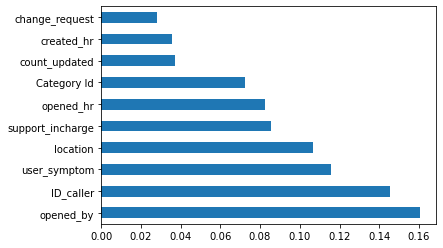

In [53]:
ranked_features=pd.Series(FI.feature_importances_,index=x1.columns)
ranked_features.nlargest(10).plot(kind='barh')
plt.show()

### 3)Feature Selection based on Information Gain

In [54]:
from sklearn.feature_selection import mutual_info_regression
mutual_info=mutual_info_regression(x1,y1)
mutual_data=pd.Series(mutual_info,index=x1.columns)
mutual_data.sort_values(ascending=False)

ID_caller             0.347518
user_symptom          0.325823
Category Id           0.226460
opened_by             0.170351
support_incharge      0.125939
Created_by            0.120373
location              0.115495
problem_ID            0.094529
Support_group         0.080514
updated_hr            0.043916
Doc_knowledge         0.040415
change_request        0.038356
created_day           0.036967
created_hr            0.033571
updated_by            0.029304
opened_day            0.017451
updated_day           0.013233
notify                0.011101
count_reassign        0.007552
created_month         0.006281
type_contact          0.004461
active                0.004341
opened_hr             0.003341
opened_month          0.000000
updated_month         0.000000
count_updated         0.000000
count_opening         0.000000
confirmation_check    0.000000
ID_status             0.000000
dtype: float64

### 4)Recursive Feature Elimination

In [129]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

FE = LogisticRegression(max_iter=500)
rfe = RFE(FE,7)
fit = rfe.fit(x1, y1)


C:\Users\jeysu_000\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_features_to_select=7 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\jeysu_000\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\jeysu_000\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the

C:\Users\jeysu_000\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\jeysu_000\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
 

In [130]:
for i in range(x1.shape[1]):
    print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))

Column: 0, Selected False, Rank: 6.000
Column: 1, Selected False, Rank: 15.000
Column: 2, Selected False, Rank: 4.000
Column: 3, Selected False, Rank: 12.000
Column: 4, Selected False, Rank: 11.000
Column: 5, Selected False, Rank: 17.000
Column: 6, Selected True, Rank: 1.000
Column: 7, Selected False, Rank: 5.000
Column: 8, Selected False, Rank: 18.000
Column: 9, Selected False, Rank: 21.000
Column: 10, Selected True, Rank: 1.000
Column: 11, Selected False, Rank: 2.000
Column: 12, Selected True, Rank: 1.000
Column: 13, Selected False, Rank: 16.000
Column: 14, Selected False, Rank: 3.000
Column: 15, Selected False, Rank: 22.000
Column: 16, Selected False, Rank: 10.000
Column: 17, Selected False, Rank: 23.000
Column: 18, Selected True, Rank: 1.000
Column: 19, Selected True, Rank: 1.000
Column: 20, Selected False, Rank: 19.000
Column: 21, Selected False, Rank: 8.000
Column: 22, Selected True, Rank: 1.000
Column: 23, Selected False, Rank: 20.000
Column: 24, Selected False, Rank: 9.000
Colu

opened_by
Problem_id
change_request
opened_hr
updated_month

In [58]:
x1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID_status           349 non-null    int32 
 1   active              349 non-null    int64 
 2   count_reassign      349 non-null    int64 
 3   count_opening       349 non-null    int64 
 4   count_updated       349 non-null    int64 
 5   ID_caller           349 non-null    int32 
 6   opened_by           349 non-null    int32 
 7   Created_by          349 non-null    int32 
 8   updated_by          349 non-null    int32 
 9   type_contact        349 non-null    object
 10  location            349 non-null    int32 
 11  Category Id         349 non-null    int32 
 12  user_symptom        349 non-null    int32 
 13  Support_group       349 non-null    int32 
 14  support_incharge    349 non-null    int32 
 15  Doc_knowledge       349 non-null    object
 16  confirmation_check  349 no

## Based Feature selection analysis the following features are selected for model build

In [59]:
# Final Feature data
x_final=x1
x_final=x_final.drop(['ID_status','active','count_reassign','count_opening','count_updated','Created_by','updated_by','type_contact',
            'Category Id','Support_group','Doc_knowledge','confirmation_check','notify','problem_ID','opened_month',
             'opened_day','opened_hr','created_month','created_day','created_hr','updated_month','updated_day','updated_hr'
            ], axis=1)

In [60]:
x_final

,ID_caller,opened_by,location,user_symptom,support_incharge,change_request
0,8,8,3,22,24,0
1,8,8,3,22,24,0
2,8,8,3,22,24,0
3,8,8,3,22,24,0
4,8,3,6,13,21,0
5,8,3,6,13,17,0
6,8,3,6,13,17,0
7,8,3,6,13,17,0
8,8,3,6,13,17,0
9,8,3,6,13,17,0


In [95]:
X=np.asarray(x_final,dtype=np.int)
Y=np.asarray(y1,dtype=np.int)

# Model Build

In [96]:
# split data into train and test sets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
seed = 40
test_size = 0.33
x_train, x_test, y_train, y_test = train_test_split(x_final, y1, test_size=test_size, random_state=seed)

#Array format
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)


## Logistic Regression

In [125]:
#Logistic regression
lr = LogisticRegression(solver='sag',multi_class='multinomial')
lr.fit(x_train, y_train)
lr.score(x_test, y_test)

C:\Users\jeysu_000\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


0.9396551724137931

## With SVM

In [126]:
#SVM
from sklearn.svm import SVC
svm = SVC(kernel='sigmoid',gamma='auto')
svm.fit(x_train, y_train)
svm.score(x_test, y_test)

0.9051724137931034

## With XGBoost

In [112]:
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators=50)
xgb.fit(X_train, Y_train)
xgb.score(X_test, Y_test)

[17:13:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\jeysu_000\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.9913793103448276

## With KNN

In [165]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5,algorithm='auto',metric='minkowski',leaf_size=50)

knn.fit(X_train, Y_train)
knn.score(X_test, Y_test)

0.9913793103448276

## Gaussian Naive Bayes Classification

In [133]:
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
GNB.fit(X_train, Y_train)
GNB.score(X_test, Y_test)
#results_GNB = cross_val_score(GNB, X_test, Y_test, cv=kfold)
#print(results_GNB.mean())

0.8275862068965517

## KFold model cross validation

In [116]:
# Evaluate using Cross Validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

x_fold= x_final.values
y_fold = y1.values

In [147]:
# COnsolidate model accuracies
models = []
models.append(('LR', LogisticRegression(solver='sag',multi_class='multinomial',max_iter=400)))
models.append(('SVM', SVC(kernel='sigmoid',gamma='auto')))
models.append(('KNN', KNeighborsClassifier(n_neighbors=3,weights='uniform', algorithm='auto',leaf_size=20)))
models.append(('GNB', GaussianNB()))
models.append(('XGB', XGBClassifier(n_estimators=50)))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    num_folds = 10
    seed = 7
    kfold = KFold(n_splits=num_folds, shuffle=True)
    cv_results = cross_val_score(model, x_fold, y_fold, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

C:\Users\jeysu_000\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\jeysu_000\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\jeysu_000\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\jeysu_000\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\jeysu_000\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter wa

LR: 0.902689 (0.028910)
SVM: 0.902521 (0.038918)
KNN: 0.979916 (0.025744)
GNB: 0.836639 (0.038581)
[19:01:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:01:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

C:\Users\jeysu_000\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[19:01:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:01:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:01:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:01:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64

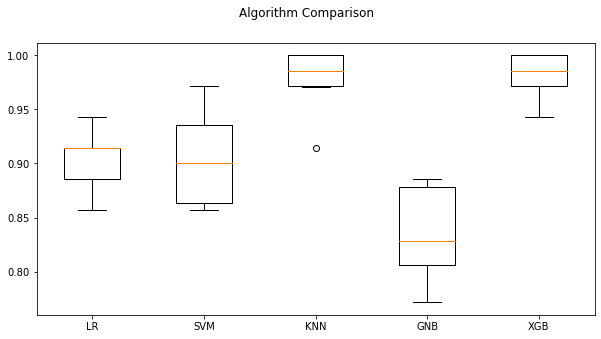

In [156]:
# boxplot algorithm comparison
fig = pyplot.figure(figsize=(10,5))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()